# 2021 Car Crashes by Neighborhood - Boston

## Import necessary libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
from folium import plugins

## Data wrangling and selecting the area of interest

In [3]:
sf_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/MAtownssurvey_shp/TOWNSSURVEY_POLY.shp"
sf = gpd.read_file(sf_path, encoding='utf-8')
bos_sf = sf[sf.TOWN == 'BOSTON']
bos_shape = bos_sf.to_crs('epsg:4326')
bos_shape

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,ISLAND,COASTAL_PO,FOURCOLOR,...,FIPS_MCD,FIPS_COUNT,ACRES,SQUARE_MIL,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry
229,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,217.700000,0.340000,617594,28637,3564,5430.029078,8.809978e+05,"POLYGON ((-70.95597 42.34391, -70.95597 42.343..."
235,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,2.822000,0.004000,617594,28637,3564,796.954688,1.142009e+04,"POLYGON ((-70.94382 42.33116, -70.94382 42.331..."
317,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,1.747000,0.003000,617594,28637,3564,641.236403,7.070270e+03,"POLYGON ((-71.07978 42.26951, -71.07963 42.269..."
392,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,241.674000,0.378000,617594,28637,3564,7442.970261,9.780188e+05,"POLYGON ((-71.00925 42.30550, -71.00991 42.305..."
395,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,25.865000,0.040000,617594,28637,3564,2132.312333,1.046713e+05,"POLYGON ((-70.95340 42.31291, -70.95334 42.312..."
512,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,250.990000,0.392000,617594,28637,3564,7160.027832,1.015719e+06,"POLYGON ((-70.95817 42.32711, -70.95847 42.327..."
514,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,69.348000,0.108000,617594,28637,3564,2822.859019,2.806428e+05,"POLYGON ((-70.92755 42.33107, -70.92753 42.331..."
677,BOSTON,35,570719,574283,588957,14674,C,1,NO,1,...,25025440,25,9.709000,0.015000,617594,28637,3564,2088.150627,3.929173e+04,"POLYGON ((-71.08400 42.35426, -71.08387 42.354..."
771,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,2.738000,0.004000,617594,28637,3564,486.763608,1.108146e+04,"POLYGON ((-71.06825 42.36859, -71.06832 42.368..."
775,BOSTON,35,570719,574283,588957,14674,C,0,NO,1,...,25025440,25,841.450000,1.315000,617594,28637,3564,16210.196820,3.405229e+06,"POLYGON ((-71.07425 42.39050, -71.07420 42.390..."


## Plotting roads

In [4]:
road_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/MassDOT_Roads_SHP/EOTROADS_ARC.shp"
roads = gpd.read_file(road_path)
roads = roads.to_crs('epsg:4326')
roads = gpd.sjoin(roads, bos_shape, op="intersects")
roads.shape

(16683, 94)

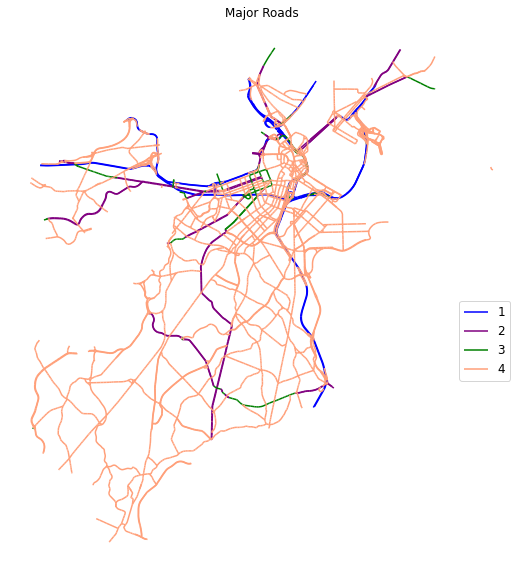

In [45]:
#Group roads into four categories: 1)Limited Access Highway, 2)Multi-lane Highway, 3)Other numbered route, 4)Major Road - arterials and collectors
main_roads = roads[(roads.CLASS == 1) | (roads.CLASS == 2) | (roads.CLASS == 3) | (roads.CLASS == 4)]

# Create a dictionary and assign each attribute value to a particular color
roadPalette = { 1: 'blue',
                2: 'purple',
                3: 'green',
                4: 'lightsalmon'}
roadPalette
{1: 'blue', 2: 'purple', 3: 'green', 4: 'lightsalmon'}


# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in main_roads.groupby('CLASS'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Major Roads')

ax.set_axis_off()
plt.show()

In [52]:
main_roads

,STREETNAME,CLASS,ADMIN_TYPE,RT_NUMBER,ALTRTNUM1,ALTRTNUM2,ALTRTNUM3,ALTRTNUM4,ALTRT1TYPE,RDTYPE,...,FIPS_PLACE,FIPS_MCD,FIPS_COUNT,ACRES,SQUARE_MIL,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng_right,SHAPE_Area
110,DERNE STREET,4,0,None,None,None,None,None,0,4,...,07000,25025440,25,25559.218,39.936,617594,28637,3564,101363.081305,1.034266e+08
111,DEVONSHIRE STREET,4,0,None,None,None,None,None,0,4,...,07000,25025440,25,25559.218,39.936,617594,28637,3564,101363.081305,1.034266e+08
1456,GALLIVAN BOULEVARD,2,3,3A,None,None,None,None,0,2,...,07000,25025440,25,25559.218,39.936,617594,28637,3564,101363.081305,1.034266e+08
1465,RAMP-RTS 93 SB/3 SB TO RTS 3A SB/203 EB,4,3,3A,None,None,None,None,0,7,...,07000,25025440,25,25559.218,39.936,617594,28637,3564,101363.081305,1.034266e+08
2549,MASSACHUSETTS TURNPIKE,1,1,90,None,None,None,None,0,1,...,07000,25025440,25,25559.218,39.936,617594,28637,3564,101363.081305,1.034266e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403250,BROADWAY,3,3,99,None,None,None,None,0,3,...,07000,25025440,25,16.876,0.026,617594,28637,3564,1612.554054,7.575913e+04
403251,BROADWAY,3,3,99,None,None,None,None,0,3,...,07000,25025440,25,16.876,0.026,617594,28637,3564,1612.554054,7.575913e+04
403259,ALFORD STREET,3,3,99,None,None,None,None,0,3,...,07000,25025440,25,16.876,0.026,617594,28637,3564,1612.554054,7.575913e+04
403271,ALFORD STREET,3,3,99,None,None,None,None,0,3,...,07000,25025440,25,16.876,0.026,617594,28637,3564,1612.554054,7.575913e+04


## Geocode car crashes data

In [106]:
car_crashes_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/XLS/2021_Vehicle_Level_Crash_Details_Boston_EditedV2.csv"
car_crashes = gpd.read_file(car_crashes_path)
df = pd.read_csv(car_crashes_path)
car_crash_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LON, df.LAT))
car_crash_gdf = car_crash_gdf.set_crs(('epsg:4326'), allow_override=True)

#Set a variable for spatial join with zipcode area
right = car_crash_gdf
car_crashes.head()
car_crash_gdf['INDEX'] = np.arange(car_crash_gdf.shape[0])
car_crash_gdf.set_index(['INDEX'])
car_crash_gdf.info()
car_crash_gdf.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CITY_TOWN_NAME         3027 non-null   object  
 1   CRASH_DATE_TEXT        3027 non-null   object  
 2   LAT                    3027 non-null   float64 
 3   LON                    3027 non-null   float64 
 4   CRASH_TIME_2           3025 non-null   object  
 5   CRASH_DATETIME         3025 non-null   object  
 6   CRASH_HOUR             3025 non-null   object  
 7   CRASH_STATUS           3027 non-null   object  
 8   CRASH_SEVERITY_DESCR   3027 non-null   object  
 9   MAX_INJR_SVRTY_CL      3027 non-null   object  
 10  NUMB_VEHC              3027 non-null   int64   
 11  NUMB_NONFATAL_INJR     3027 non-null   int64   
 12  NUMB_FATAL_INJR        3027 non-null   int64   
 13  IS_GEOCODED            2830 non-null   object  
 14  GEOCODING_METHOD_NAME  2958 non-

,CITY_TOWN_NAME,CRASH_DATE_TEXT,LAT,LON,CRASH_TIME_2,CRASH_DATETIME,CRASH_HOUR,CRASH_STATUS,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,...,X,Y,YEAR,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,geometry,INDEX
0,BOSTON,8/12/2021,42.285134,-71.156461,12:45:00,2021/08/12 12:45:00+00,12:00:00,Open Fatal,Fatal injury,Fatal injury (K),...,228334.0154,892796.8125,2021,NaN,NaN,NaN,NaN,NaN,POINT (-71.15646 42.28513),0
1,BOSTON,8/12/2021,42.285134,-71.156461,12:45:00,2021/08/12 12:45:00+00,12:00:00,Open Fatal,Fatal injury,Fatal injury (K),...,228334.0154,892796.8125,2021,NaN,NaN,NaN,NaN,NaN,POINT (-71.15646 42.28513),1
2,BOSTON,5/12/2021,42.287663,-71.106652,2:22:00,2021/05/12 14:22:00+00,2:00:00,Open Fatal,Fatal injury,Fatal injury (K),...,232440.7966,893095.5000,2021,NaN,NaN,NaN,NaN,NaN,POINT (-71.10665 42.28766),2
3,BOSTON,6/22/2021,42.290817,-71.059657,4:26:00,2021/06/22 16:26:00+00,4:00:00,Open,Unknown,Not reported,...,236314.7811,893464.7498,2021,NaN,NaN,NaN,NaN,NaN,POINT (-71.05966 42.29082),3
4,BOSTON,6/22/2021,42.290817,-71.059657,4:26:00,2021/06/22 16:26:00+00,4:00:00,Open,Unknown,Not reported,...,236314.7811,893464.7498,2021,NaN,NaN,NaN,NaN,NaN,POINT (-71.05966 42.29082),4


## Prepare Boston neighborhood area

In [44]:
bos_neighborhood_path = "/Users/judyfung/Documents/Python Learning/GeoPandasProject/MACarCrashes2021/Data/SHP/Boston_Neighborhoods/Boston_Neighborhoods.shp"
bos_neighborhood = gpd.read_file(bos_neighborhood_path)
bos_neighborhood = bos_neighborhood.to_crs('epsg:4326')

# Delete row with harbor islands
bos_neighborhood = bos_neighborhood.drop(labels=25, axis=0)

#Set a variable for spatial join for car crashes points
left = bos_neighborhood
bos_neighborhood

,OBJECTID,Name,Acres,Neighborho,SqMiles,ShapeSTAre,ShapeSTLen,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27200, -71.12575 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32609, -71.10488 42.326..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33576, -71.09275 42.333..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33672, -71.09892 42.336..."
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34877, -71.06739 42.348..."
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34982, -71.05877 42.349..."
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05790 42.35237, -71.05796 42.352..."
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05199 42.36883, -71.05169 42.368..."
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29322, -71.09662 42.293..."
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34774, -71.06834 42.347..."


## Spatial Join

In [9]:
sjoined_crashes = gpd.sjoin(left, right, how='left', op='intersects')
sjoined_crashes.head()
sjoined_crashes
sjoined_crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2900 entries, 0 to 24
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   OBJECTID               2900 non-null   int64   
 1   Name                   2900 non-null   object  
 2   Acres                  2900 non-null   float64 
 3   Neighborho             2900 non-null   object  
 4   SqMiles                2900 non-null   float64 
 5   ShapeSTAre             2900 non-null   float64 
 6   ShapeSTLen             2900 non-null   float64 
 7   geometry               2900 non-null   geometry
 8   index_right            2900 non-null   int64   
 9   CITY_TOWN_NAME         2900 non-null   object  
 10  CRASH_DATE_TEXT        2900 non-null   object  
 11  LAT                    2900 non-null   float64 
 12  LON                    2900 non-null   float64 
 13  CRASH_TIME_2           2898 non-null   object  
 14  CRASH_DATETIME         2898 non-nu

In [10]:
sjoined_crashes = sjoined_crashes.rename(columns={'index_right': 'crashes'})
sjoined_crashes['crashes'] = sjoined_crashes['crashes'].apply(lambda x: 0 if x== 0 else 1)
sjoined_crashes.crashes.value_counts()

1    2899
0       1
Name: crashes, dtype: int64

In [59]:
sjoined_crashes = sjoined_crashes.groupby('Neighborho', as_index='False').agg({'crashes': 'sum', 'geometry': 'first'})
sjoined_crashes = gpd.GeoDataFrame(sjoined_crashes, crs='epsg:4326')
sjoined_crashes.shape

(25, 2)

## Plotting

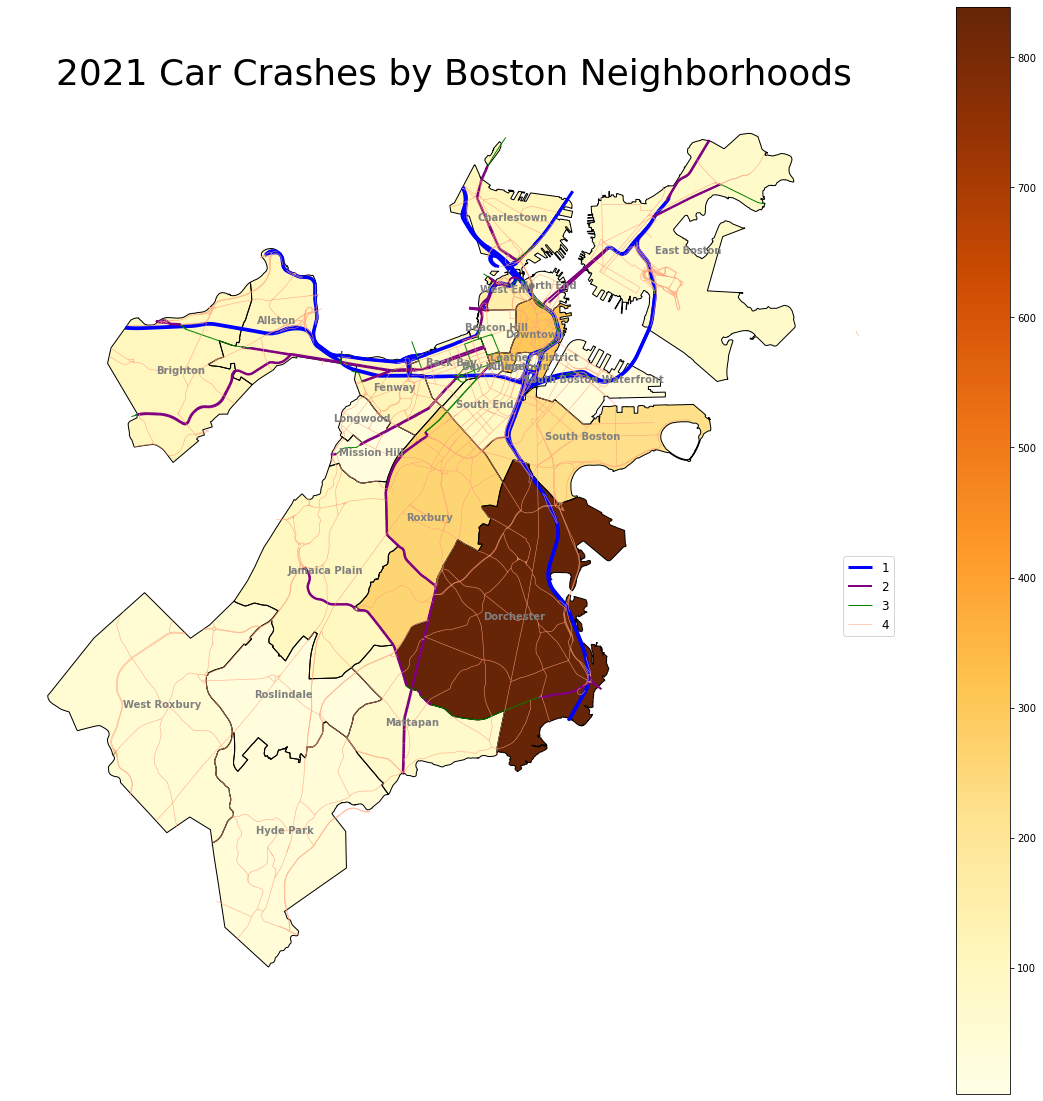

In [60]:
ax = sjoined_crashes.plot(figsize=(20,20), column='crashes', cmap='YlOrBr', k=5, legend=True)

#Plot neighborhoood boundary
bos_neighborhood.plot(ax=ax, color='none', edgecolor='black' )

# Create dictionary to map each attribute value to a line width for roads
lineWidths = {1: 3, 2: 2, 3: 1, 4: .5}


# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in main_roads.groupby('CLASS'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype, linewidth=lineWidths[ctype])
    
#Label the neighborhoods
bos_neighborhood.apply(lambda x: ax.annotate(text=x.Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10, weight='bold', color='grey'), axis=1);

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set_title("2021 Car Crashes by Boston Neighborhoods", fontsize=36)
ax.set_axis_off()

## Visualize the above heat map as a interactive web map (In Development)